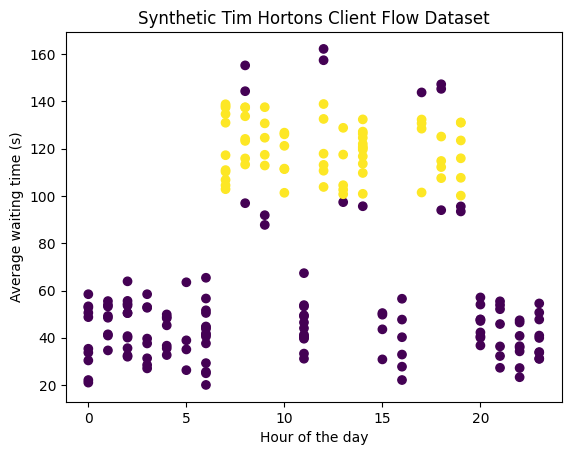

/tmp/ipykernel_371/4068931632.py:53: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(feature_map=feature_map, ansatz=var_form,
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes


# Create a synthetic dataset for Tim Hortons client flow
def create_synthetic_data(n_samples=200):
    np.random.seed(42)

    hours = np.random.randint(0, 24, n_samples)
    avg_waiting_time = np.zeros(n_samples)

    for i in range(n_samples):
        if 7 <= hours[i] <= 10 or 12 <= hours[i] <= 14 or 17 <= hours[i] <= 19:
            avg_waiting_time[i] = np.random.normal(120, 20)  # High client flow
        else:
            avg_waiting_time[i] = np.random.normal(40, 10)   # Low client flow

    X = np.column_stack((hours, avg_waiting_time))
    y = np.array([1 if 120 - 20 <= t <= 120 +
                 20 else 0 for t in avg_waiting_time])

    return X, y


# Visualize the dataset
def visualize_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Hour of the day')
    plt.ylabel('Average waiting time (s)')
    plt.title('Synthetic Tim Hortons Client Flow Dataset')
    plt.show()


# Run the VQC algorithm on the dataset
def run_vqc(X_train, X_test, y_train, y_test):
    # Set up the feature map
    feature_map = ZZFeatureMap(2, reps=2)

    # Set up the variational circuit
    var_form = RealAmplitudes(2, reps=2)

    # Set up the quantum instance
    quantum_instance = QuantumInstance(
        Aer.get_backend('aer_simulator_statevector'))

    # Initialize the VQC algorithm with the feature map, variational circuit, and quantum instance
    vqc = VQC(feature_map=feature_map, ansatz=var_form,
              quantum_instance=quantum_instance)

    # Train and test the VQC model
    vqc.fit(X_train, y_train)

    # Calculate the testing accuracy
    testing_accuracy = vqc.score(X_test, y_test)

    return testing_accuracy


if __name__ == '__main__':
    # Create and visualize the synthetic dataset
    X, y = create_synthetic_data()
    visualize_data(X, y)

    # Pre-process the data
    scaler = MinMaxScaler((-1, 1))
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42)

    # Run VQC on the dataset and display the results
    testing_accuracy = run_vqc(X_train, X_test, y_train, y_test)
    print("VQC classification success ratio: ", testing_accuracy)
